In [81]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, PowerTransformer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns



sk.set_config(display='diagram')

# Functions

# Load Data

In [82]:
train_df = pd.read_csv('./data/moneyball-training-data.csv')
train_df.drop(labels=['TEAM_BATTING_HBP','TEAM_BASERUN_CS'], axis=1, inplace=True)

train_df.drop(['INDEX'], axis=1, inplace=True)
train_df.reindex()

train_df['TEAM_BATTING_1B'] = train_df['TEAM_BATTING_H'] - train_df['TEAM_BATTING_2B'] - train_df['TEAM_BATTING_3B'] - train_df['TEAM_BATTING_HR']
train_df.drop(['TEAM_BATTING_H'], axis=1, inplace=True)

#train_df.dropna(inplace=True)
train_df

,TARGET_WINS,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP,TEAM_BATTING_1B
0,39,194,39,13,143,842.0,NaN,9364,84,927,5456.0,1011,NaN,1199
1,70,219,22,190,685,1075.0,37.0,1347,191,689,1082.0,193,155.0,908
2,86,232,35,137,602,917.0,46.0,1377,137,602,917.0,175,153.0,973
3,70,209,38,96,451,922.0,43.0,1396,97,454,928.0,164,156.0,1044
4,82,186,27,102,472,920.0,49.0,1297,102,472,920.0,138,168.0,982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,83,294,25,144,522,990.0,100.0,1404,144,522,990.0,102,152.0,941
2272,67,276,27,151,496,925.0,109.0,1361,151,496,925.0,99,171.0,907
2273,81,311,32,117,491,1090.0,45.0,1367,117,491,1090.0,92,156.0,907
2274,71,322,22,164,594,1156.0,123.0,1437,164,594,1156.0,131,123.0,929


In [83]:
train_df.isnull().sum() / len(train_df)

TARGET_WINS         0.000000
TEAM_BATTING_2B     0.000000
TEAM_BATTING_3B     0.000000
TEAM_BATTING_HR     0.000000
TEAM_BATTING_BB     0.000000
TEAM_BATTING_SO     0.044815
TEAM_BASERUN_SB     0.057557
TEAM_PITCHING_H     0.000000
TEAM_PITCHING_HR    0.000000
TEAM_PITCHING_BB    0.000000
TEAM_PITCHING_SO    0.044815
TEAM_FIELDING_E     0.000000
TEAM_FIELDING_DP    0.125659
TEAM_BATTING_1B     0.000000
dtype: float64

# Train Split

In [84]:
train_df = train_df.drop(['TEAM_FIELDING_DP'], axis=1)
#train_df.dropna(inplace=True)
X = train_df.drop(['TARGET_WINS'], axis=1).values
y = train_df['TARGET_WINS']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
print(X_train.shape, y_train.shape)

(1593, 12) (1593,)


# Transform

## impute missing values

In [86]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_trf = imp_num.fit_transform(X_train)

In [87]:
trf_df = pd.DataFrame(X_train_trf)
trf_df.isnull().sum() / len(trf_df)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
dtype: float64

In [88]:
X_test_trf = imp_num.transform(X_test)

In [89]:
trf_df = pd.DataFrame(X_test_trf)
trf_df.isnull().sum() / len(trf_df)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
dtype: float64

## transform data

In [90]:
scaler_sd = StandardScaler()
X_train_sd = scaler_sd.fit_transform(X_train_trf)

In [91]:
scaler_rs = RobustScaler()
X_train_rs = scaler_rs.fit_transform(X_train_trf)

In [92]:
scaler_norm = Normalizer()
X_train_norm = scaler_norm.fit_transform(X_train_trf)

In [93]:
scaler_pwr = PowerTransformer()
X_train_pwr = scaler_pwr.fit_transform(X_train_trf)

In [94]:
x_dict = {"orig":X_train_trf,"sd":X_train_sd,"rs":X_train_rs,"norm":X_train_norm, "pwr":X_train_pwr}

# Model - Lasso - Grid Search

orig ) Best Accuracy Score:  0.2746    Parameters: {} {'alpha': 0.1}
sd ) Best Accuracy Score:  0.275    Parameters: {} {'alpha': 0.010000000000000002}
rs ) Best Accuracy Score:  0.275    Parameters: {} {'alpha': 0.007}
norm ) Best Accuracy Score:  0.2052    Parameters: {} {'alpha': 0.003}
pwr ) Best Accuracy Score:  0.2563    Parameters: {} {'alpha': 0.036000000000000004}


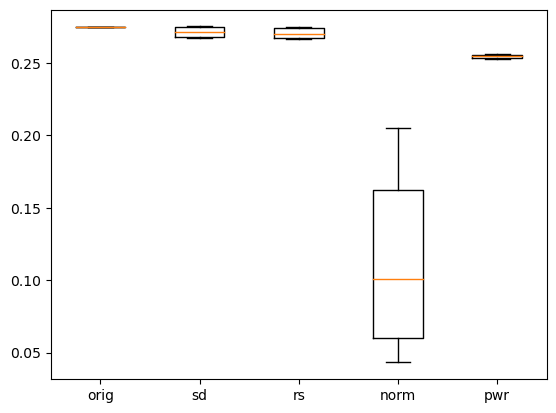

In [102]:
results_lasso = []

lasso = Lasso()
n_splits = 10
n_iter=100
random_state=42


kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

#params = {"alpha" : np.linspace(0.01, 0.1, 100),
#         "tol": np.linspace(0.0001, 0.001, 10)}

params = {"alpha" : np.linspace(0.001, 0.1, 100)}

lasso_cv = RandomizedSearchCV(lasso, params, cv=kf, n_iter=n_iter, random_state=random_state)

# Loop through 
for name, x in x_dict.items():
    lasso_cv.fit(x,y_train)
    cv_results = lasso_cv.cv_results_['mean_test_score']
    results_lasso.append(cv_results)
    
    print(name, ') Best Accuracy Score: ' ,lasso_cv.best_score_.round(4), "   Parameters: {}" , lasso_cv.best_params_)
    
plt.boxplot(results_lasso, labels=x_dict.keys())
plt.show()

Tuned Regression Parameters: {'alpha': 0.1}
Tuned Regression Best Accuracy Score: 0.27463599894709667


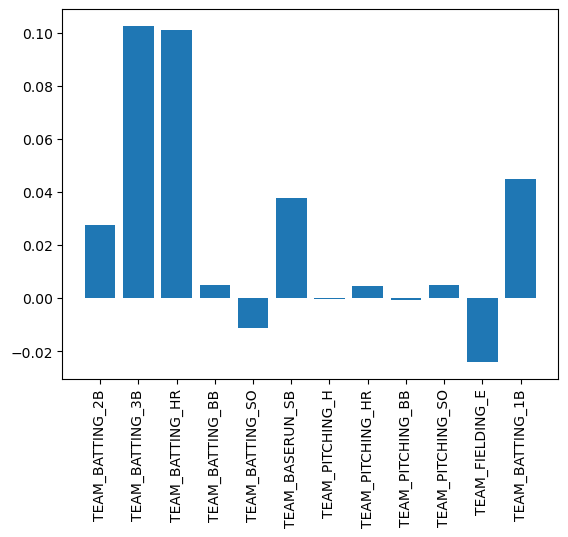

In [103]:
lasso = Lasso()
lasso_cv = RandomizedSearchCV(lasso, params, cv=kf, n_iter=100)
lasso_cv.fit(x_dict['orig'], y_train)

print("Tuned Regression Parameters: {}".format(lasso_cv.best_params_))
print("Tuned Regression Best Accuracy Score: {}".format(lasso_cv.best_score_))

alpha_fit = lasso_cv.best_params_['alpha']
alpha_fit

names = train_df.drop("TARGET_WINS", axis=1).columns
lasso = Lasso(alpha=alpha_fit)
lasso_coef = lasso.fit(x_dict['orig'], y_train).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

## Predict

In [104]:
X_test_rs = scaler_rs.transform(X_test_trf)
y_pred_lasso = lasso_cv.predict(X_test_rs)

## Performance

In [105]:
# model evaluation for testing set
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 68.35155460687014
MSE is 4915.903726279788
R2 score is -18.97980506738742
